In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [20]:
x = np.array([i*np.pi/180 for i in range(0,90,2)])
np.random.seed(10)  #Setting seed for reproducability
var = 0.25
dy = 2*0.25
y = np.sin(x) + 0.5 + np.random.normal(0,var,len(x))
y_true = np.sin(x) + 0.5
max_deg = 20
data_x = [x**(i+1) for i in range(max_deg)] + [y]
data_c = ['x'] + ['x_{}'.format(i+1) for i in range(1,max_deg)] + ['y']
data = pd.DataFrame(np.column_stack(data_x),columns=data_c)

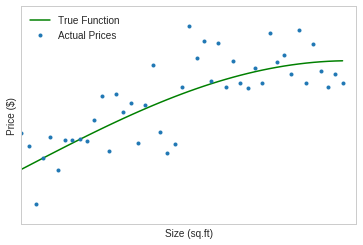

In [3]:
plt.plot(data['x'], y_true, 'g', label='True Function')
plt.xlabel('Size (sq.ft)')
plt.ylabel('Price (\$)')
plt.xticks([],[])
plt.yticks([],[])
plt.ylim(0,2)
plt.xlim(0,1.6)

plt.legend()
plt.savefig('images/true.pdf', transparent=True)




plt.plot(data['x'], data['y'], '.', label='Actual Prices')
plt.legend()
plt.savefig('images/data.pdf', transparent=True)

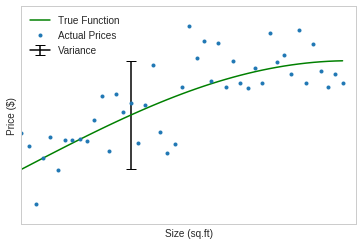

In [86]:
plt.plot(data['x'], y_true, 'g', label='True Function')
plt.xlabel('Size (sq.ft)')
plt.ylabel('Price (\$)')
plt.xticks([],[])
plt.yticks([],[])
plt.ylim(0,2)
plt.xlim(0,1.6)
# plt.fill_between(data['x'], y_true-dy, y_true+dy, color='green',alpha=0.2, label='Variance')
plt.errorbar(data['x'][15], y_true[15], yerr=dy, fmt='k', capsize=5, label='Variance')
plt.plot(data['x'], data['y'], '.', label='Actual Prices')

plt.legend()


plt.savefig('images/data_var.pdf', transparent=True)

## Bias New

In [3]:
x = np.array([i*np.pi/180 for i in range(0,90,2)])
np.random.seed(10)  #Setting seed for reproducability
var = 0.25
dy = 2*0.25
y = np.sin(x) + 0.5 + np.random.normal(0,var,len(x))
y_true = np.sin(x) + 0.5
max_deg = 16
data_x = [x**(i+1) for i in range(max_deg)] + [y]
data_c = ['x'] + ['x_{}'.format(i+1) for i in range(1,max_deg)] + ['y']
data = pd.DataFrame(np.column_stack(data_x),columns=data_c)

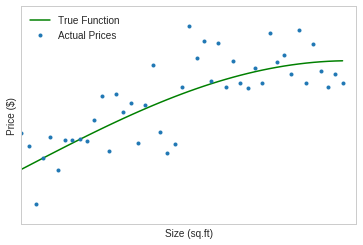

In [7]:
plt.plot(data['x'], y_true, 'g', label='True Function')
plt.xlabel('Size (sq.ft)')
plt.ylabel('Price (\$)')
plt.xticks([],[])
plt.yticks([],[])
plt.ylim(0,2)
plt.xlim(0,1.6)
plt.plot(data['x'], data['y'], '.', label='Actual Prices')
plt.legend()

plt.savefig('images/biasn_1.pdf', transparent=True)

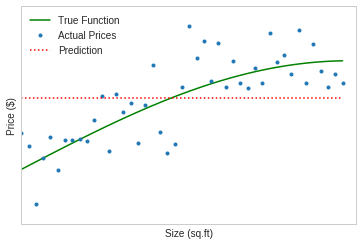

In [11]:
plt.plot(data['x'], y_true, 'g', label='True Function')
plt.xlabel('Size (sq.ft)')
plt.ylabel('Price (\$)')
plt.xticks([],[])
plt.yticks([],[])
plt.ylim(0,2)
plt.xlim(0,1.6)
plt.plot(data['x'], data['y'], '.', label='Actual Prices')
plt.plot(data['x'], [data['y'].mean() for _ in data['x']], ':r', label='Prediction')
plt.legend()

plt.savefig('images/biasn_2.pdf', transparent=True)

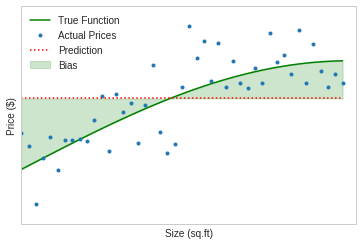

In [12]:
plt.plot(data['x'], y_true, 'g', label='True Function')
plt.xlabel('Size (sq.ft)')
plt.ylabel('Price (\$)')
plt.xticks([],[])
plt.yticks([],[])
plt.ylim(0,2)
plt.xlim(0,1.6)
plt.plot(data['x'], data['y'], '.', label='Actual Prices')
plt.plot(data['x'], [data['y'].mean() for _ in data['x']], ':r', label='Prediction')
plt.fill_between(x, y_true, [data['y'].mean() for _ in data['x']], color='green',alpha=0.2, label='Bias')
plt.legend()

plt.savefig('images/biasn_3.pdf', transparent=True)

## Bias Old

In [14]:
x1 = np.array([i*np.pi/180 for i in range(0,70,2)])
np.random.seed(10)  #Setting seed for reproducability
var = 0.25
dy = 2*0.25
y1 = np.sin(x1) + 0.5 + np.random.normal(0,var,len(x1))
y_true = np.sin(x) + 0.5

In [15]:
x2 = np.array([i*np.pi/180 for i in range(20,90,2)])
np.random.seed(40) 
y2 = np.sin(x2) + 0.5 + np.random.normal(0,var,len(x2))
y_true = np.sin(x) + 0.5

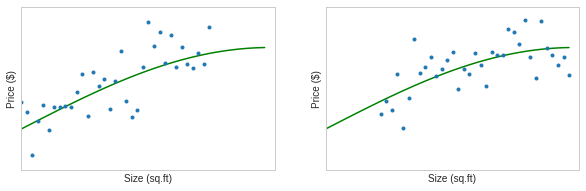

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
plt.setp(ax, xticks=[], xticklabels=[], yticks=[], yticklabels=[], xlim=(0,1.6), ylim=(0,2))


ax[0].plot(x, y_true, 'g', label='True Function')
ax[0].set_xlabel('Size (sq.ft)')
ax[0].set_ylabel('Price (\$)')
ax[0].plot(x1, y1, '.', label='Actual Prices')

ax[1].plot(x, y_true, 'g', label='True Function')
ax[1].set_xlabel('Size (sq.ft)')
ax[1].set_ylabel('Price (\$)')
ax[1].plot(x2, y2, '.', label='Actual Prices')

plt.savefig('images/bias1.pdf', transparent=True, bbox_inches='tight')

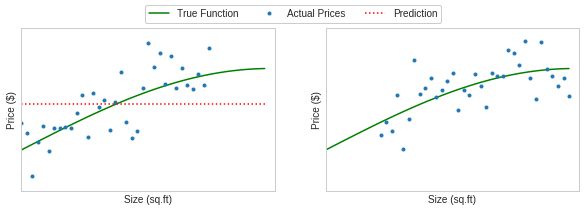

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
plt.setp(ax, xticks=[], xticklabels=[], yticks=[], yticklabels=[], xlim=(0,1.6), ylim=(0,2))


ax[0].plot(x, y_true, 'g', label='True Function')
ax[0].set_xlabel('Size (sq.ft)')
ax[0].set_ylabel('Price (\$)')
ax[0].plot(x1, y1, '.', label='Actual Prices')
ax[0].plot(x, [y1.mean() for _ in x], 'r:', label='Prediction')

ax[1].plot(x, y_true, 'g', label='True Function')
ax[1].set_xlabel('Size (sq.ft)')
ax[1].set_ylabel('Price (\$)')
ax[1].plot(x2, y2, '.', label='Actual Prices')

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', frameon=True, fancybox=True, framealpha=1, ncol=3)
plt.savefig('images/bias2.pdf', transparent=True, bbox_inches='tight')

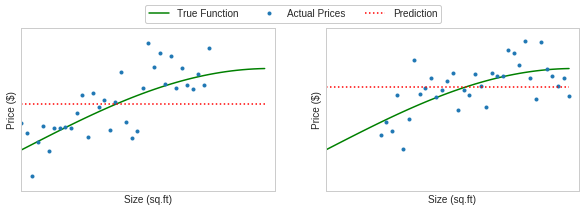

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
plt.setp(ax, xticks=[], xticklabels=[], yticks=[], yticklabels=[], xlim=(0,1.6), ylim=(0,2))


ax[0].plot(x, y_true, 'g', label='True Function')
ax[0].set_xlabel('Size (sq.ft)')
ax[0].set_ylabel('Price (\$)')
ax[0].plot(x1, y1, '.', label='Actual Prices')
ax[0].plot(x, [y1.mean() for _ in x], 'r:', label='Prediction')

ax[1].plot(x, y_true, 'g', label='True Function')
ax[1].set_xlabel('Size (sq.ft)')
ax[1].set_ylabel('Price (\$)')
ax[1].plot(x2, y2, '.', label='Actual Prices')
ax[1].plot(x, [y2.mean() for _ in x], 'r:', label='Prediction')

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', frameon=True, fancybox=True, framealpha=1, ncol=3)
plt.savefig('images/bias3.pdf', transparent=True, bbox_inches='tight')

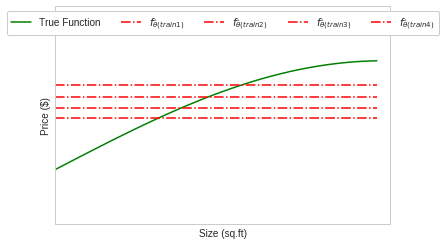

In [15]:
plt.plot(data['x'], y_true, 'g', label='True Function')
plt.xlabel('Size (sq.ft)')
plt.ylabel('Price (\$)')
plt.xticks([],[])
plt.yticks([],[])
plt.ylim(0,2)
plt.xlim(0,1.6)

plt.plot(x, [y2.mean() for _ in x], 'r-.', label=r'$f_{\hat\theta(train1)}$')
plt.plot(x, [y1.mean() for _ in x], 'r-.', label=r'$f_{\hat\theta(train2)}$')
plt.plot(x, [y2.mean()-0.3 for _ in x], 'r-.', label=r'$f_{\hat\theta(train3)}$')
plt.plot(x, [y1.mean()+0.1 for _ in x], 'r-.', label=r'$f_{\hat\theta(train4)}$')

plt.legend(loc='upper center', frameon=True, fancybox=True, framealpha=1, ncol=5)


plt.savefig('images/bias4.pdf', transparent=True, bbox_inches='tight')

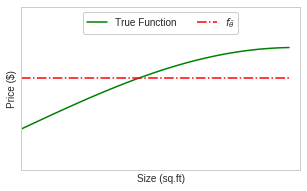

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))
plt.setp(ax, xticks=[], xticklabels=[], yticks=[], yticklabels=[], xlim=(0,1.6), ylim=(0,2))

plt.plot(data['x'], y_true, 'g', label='True Function')
plt.xlabel('Size (sq.ft)')
plt.ylabel('Price (\$)')
plt.xticks([],[])
plt.yticks([],[])
plt.ylim(0,2)
plt.xlim(0,1.6)

plt.plot(x, [(2*y2.mean()+2*y1.mean()-0.2)/4 for _ in x], 'r-.', label=r'$f_\bar{\theta}$')


plt.legend(loc='upper center', frameon=True, fancybox=True, framealpha=1, ncol=5)


plt.savefig('images/bias5.pdf', transparent=True, bbox_inches='tight')

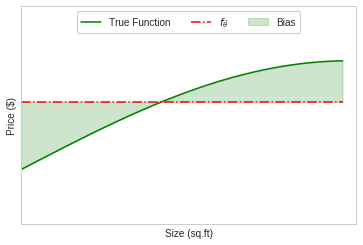

In [18]:
plt.plot(x, y_true, 'g', label='True Function')
plt.xlabel('Size (sq.ft)')
plt.ylabel('Price (\$)')
plt.xticks([],[])
plt.yticks([],[])
plt.ylim(0,2)
plt.xlim(0,1.6)

fit = np.array([(2*y2.mean()+2*y1.mean()-0.2)/4 for _ in x])
plt.plot(x, [(2*y2.mean()+2*y1.mean()-0.2)/4 for _ in x], 'r-.', label=r'$f_\bar{\theta}$')
plt.fill_between(x, y_true, fit, color='green',alpha=0.2, label='Bias')

plt.legend(loc='upper center', frameon=True, fancybox=True, framealpha=1, ncol=5)


plt.savefig('images/bias6.pdf', transparent=True, bbox_inches='tight')

### Varying Degree on Bias

In [3]:
x = np.array([i*np.pi/180 for i in range(0,90,2)])
np.random.seed(10)  #Setting seed for reproducability
var = 0.25
dy = 2*0.25
y = np.sin(x) + 0.5 + np.random.normal(0,var,len(x))
y_true = np.sin(x) + 0.5
max_deg = 16
data_x = [x**(i+1) for i in range(max_deg)] + [y]
data_c = ['x'] + ['x_{}'.format(i+1) for i in range(1,max_deg)] + ['y']
data = pd.DataFrame(np.column_stack(data_x),columns=data_c)

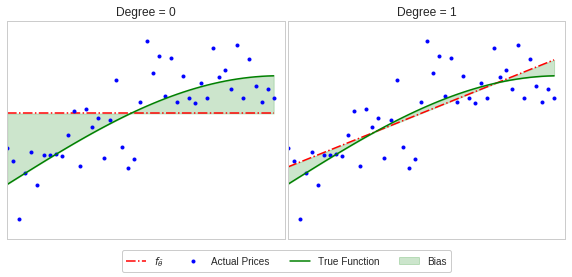

In [30]:
from sklearn.linear_model import LinearRegression

seed=10
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10, 4))
plt.setp(ax, xticks=[], xticklabels=[], yticks=[], yticklabels=[], xlim=(0,1.6), ylim=(0,2))

ax[0].plot(x, [y.mean() for _ in x], 'r-.', label=r'$f_\bar{\theta}$')
ax[0].plot(data['x'], data['y'], '.b', label='Actual Prices')
ax[0].plot(data['x'], y_true,'g', label='True Function')
ax[0].fill_between(x, y_true, [y.mean() for _ in x], color='green',alpha=0.2, label='Bias')
ax[0].set_title(f"Degree = 0")
for i,deg in enumerate([1]):
    i=i+1
    predictors = ['x']
    if deg >= 2:
        predictors.extend(['x_%d'%i for i in range(2,deg+1)])  

    regressor = LinearRegression(normalize=True)  
    regressor.fit(data[predictors],data['y'])
    y_pred = regressor.predict(data[predictors])

    ax[i].plot(data['x'],data['y'], '.b', label='Actual Prices')
    ax[i].plot(data['x'], y_pred,'-.r', label=r'$f_\bar{\theta}$')
    ax[i].plot(data['x'], y_true,'g', label='True Function')
    ax[i].fill_between(x, y_true, y_pred, color='green',alpha=0.2, label='Bias')
    ax[i].set_title(f"Degree = {deg}")

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', frameon=True, fancybox=True, framealpha=1, ncol=4)
plt.subplots_adjust(wspace=0.01, hspace=0)
plt.savefig('images/bias7.pdf', transparent=True, bbox_inches='tight')

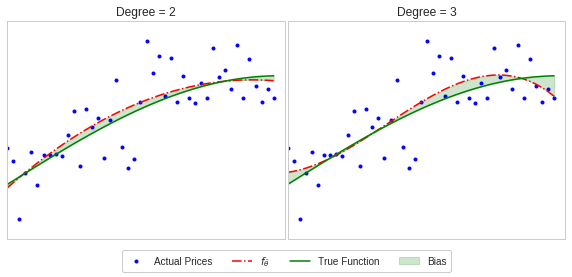

In [29]:
from sklearn.linear_model import LinearRegression

seed=10
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10, 4))
plt.setp(ax, xticks=[], xticklabels=[], yticks=[], yticklabels=[], xlim=(0,1.6), ylim=(0,2))

for i,deg in enumerate([2,3]):
    predictors = ['x']
    if deg >= 2:
        predictors.extend(['x_%d'%i for i in range(2,deg+1)])  

    regressor = LinearRegression(normalize=True)  
    regressor.fit(data[predictors],data['y'])
    y_pred = regressor.predict(data[predictors])

    ax[i].plot(data['x'],data['y'], '.b', label='Actual Prices')
    ax[i].plot(data['x'], y_pred,'-.r', label=r'$f_\bar{\theta}$')
    ax[i].plot(data['x'], y_true,'g', label='True Function')
    ax[i].fill_between(x, y_true, y_pred, color='green',alpha=0.2, label='Bias')
    ax[i].set_title(f"Degree = {deg}")

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', frameon=True, fancybox=True, framealpha=1, ncol=4)
plt.subplots_adjust(wspace=0.01, hspace=0)
plt.savefig('images/bias8.pdf', transparent=True, bbox_inches='tight')

## Variance

In [53]:
x = np.array([i*np.pi/180 for i in range(0,90,2)])
np.random.seed(10)  #Setting seed for reproducability
var = 0.25
dy = 2*0.25
y = np.sin(x) + 0.5 + np.random.normal(0,var,len(x))
y_true = np.sin(x) + 0.5
max_deg = 25
data_x = [x**(i+1) for i in range(max_deg)] + [y]
data_c = ['x'] + ['x_{}'.format(i+1) for i in range(1,max_deg)] + ['y']
data = pd.DataFrame(np.column_stack(data_x),columns=data_c)

In [6]:
x1 = np.array([i*np.pi/180 for i in range(0,70,2)])
np.random.seed(10)  #Setting seed for reproducability
var = 0.25
dy = 2*0.25
y1 = np.sin(x1) + 0.5 + np.random.normal(0,var,len(x1))
y_true = np.sin(x) + 0.5
x2 = np.array([i*np.pi/180 for i in range(20,90,2)])
np.random.seed(40) 
y2 = np.sin(x2) + 0.5 + np.random.normal(0,var,len(x2))
y_true = np.sin(x) + 0.5

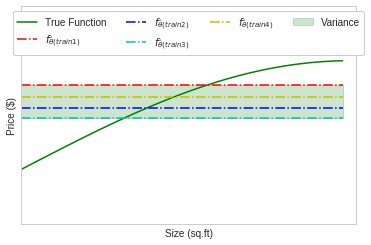

In [19]:
plt.plot(data['x'], y_true, 'g', label='True Function')
plt.xlabel('Size (sq.ft)')
plt.ylabel('Price (\$)')
plt.xticks([],[])
plt.yticks([],[])
plt.ylim(0,2)
plt.xlim(0,1.6)

dy = y2.mean()-(2*y2.mean()+2*y1.mean()-0.2)/4
plt.plot(x, [y2.mean() for _ in x], 'r-.', label=r'$f_{\hat\theta(train1)}$')
plt.plot(x, [y1.mean() for _ in x], 'b-.', label=r'$f_{\hat\theta(train2)}$')
plt.plot(x, [y2.mean()-0.3 for _ in x], 'c-.', label=r'$f_{\hat\theta(train3)}$')
plt.plot(x, [y1.mean()+0.1 for _ in x], 'y-.', label=r'$f_{\hat\theta(train4)}$')
# plt.errorbar(x[::3], [(2*y2.mean()+2*y1.mean()-0.2)/4 for _ in x][::3], yerr=dy, fmt='k', capsize=5, label='Variance')
plt.fill_between(x, [y2.mean() for _ in x], [y2.mean()-0.3 for _ in x], color='green',alpha=0.2, label='Variance')

plt.legend(loc='upper center', frameon=True, fancybox=True, framealpha=1, ncol=4)


plt.savefig('images/var1.pdf', transparent=True, bbox_inches='tight')

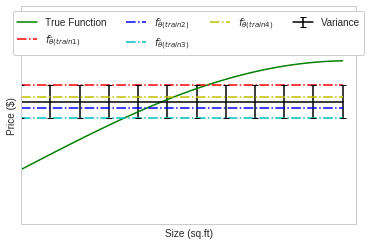

In [25]:
plt.plot(data['x'], y_true, 'g', label='True Function')
plt.xlabel('Size (sq.ft)')
plt.ylabel('Price (\$)')
plt.xticks([],[])
plt.yticks([],[])
plt.ylim(0,2)
plt.xlim(0,1.6)

dy = y2.mean()-(2*y2.mean()+2*y1.mean()-0.2)/4
plt.plot(x, [y2.mean() for _ in x], 'r-.', label=r'$f_{\hat\theta(train1)}$')
plt.plot(x, [y1.mean() for _ in x], 'b-.', label=r'$f_{\hat\theta(train2)}$')
plt.plot(x, [y2.mean()-0.3 for _ in x], 'c-.', label=r'$f_{\hat\theta(train3)}$')
plt.plot(x, [y1.mean()+0.1 for _ in x], 'y-.', label=r'$f_{\hat\theta(train4)}$')
plt.errorbar(x[::4], [(2*y2.mean()+2*y1.mean()-0.2)/4 for _ in x][::4], yerr=dy, fmt='k', capsize=3, label='Variance')
# plt.fill_between(x, [y2.mean() for _ in x], [y2.mean()-0.3 for _ in x], color='green',alpha=0.2, label='Variance')

plt.legend(loc='upper center', frameon=True, fancybox=True, framealpha=1, ncol=4)


plt.savefig('images/var2.pdf', transparent=True, bbox_inches='tight')

### Varaince Variation

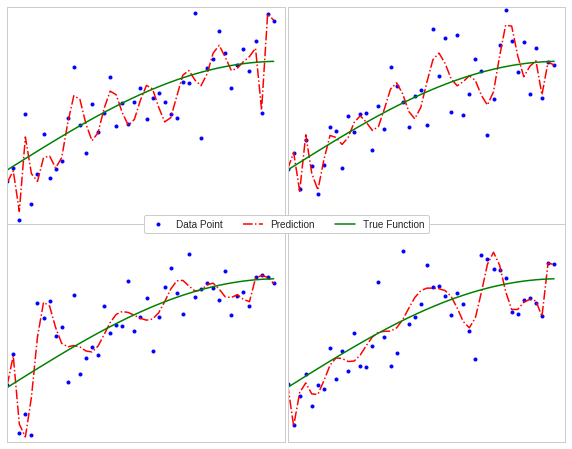

In [69]:
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(nrows=2, ncols=2, sharey=True, figsize=(10, 8))
plt.setp(ax, xticks=[], xticklabels=[], yticks=[], yticklabels=[], xlim=(0,1.6), ylim=(0,2))

modles = []

for i,seed in enumerate([2,4,8,16]):
    np.random.seed(seed)
    y_random = np.sin(x) + 0.5 + np.random.normal(0,var,len(x))
    data_x_s = [x**(i+1) for i in range(max_deg)] + [y_random]
    data_c_s = ['x'] + ['x_{}'.format(i+1) for i in range(1,max_deg)] + ['y']
    data_s = pd.DataFrame(np.column_stack(data_x_s),columns=data_c_s)
      
    deg = 25
    predictors = ['x']
    if deg > 2:
        predictors.extend(['x_%d'%i for i in range(2,deg+1)])  

    regressor = LinearRegression(normalize=True)  
    regressor.fit(data_s[predictors],data_s['y'])
    y_pred = regressor.predict(data_s[predictors])
    
    modles.append(y_pred)
    
    ax[int(i/2)][i%2].plot(data_s['x'],data_s['y'], '.b', label='Data Point')
#     ax[i].plot(data_n['x'],data_n['y'], 'ok', label='UnSelected Points')
    ax[int(i/2)][i%2].plot(data_s['x'], y_pred,'r-.', label='Prediction')
    ax[int(i/2)][i%2].plot(data['x'], y_true,'g-', label='True Function')
#     ax[i].set_title(f"{deg} : {max(regressor.coef_, key=abs):.2f}")
    

handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center', frameon=True, fancybox=True, framealpha=1, ncol=4)
plt.subplots_adjust(wspace=0.01, hspace=0)
plt.savefig('images/var3.pdf', transparent=True, bbox_inches='tight')

In [82]:
from sklearn.linear_model import LinearRegression

modles = []

for i,seed in enumerate(range(1,50)):
    np.random.seed(seed)
    y_random = np.sin(x) + 0.5 + np.random.normal(0,var,len(x))
    data_x_s = [x**(i+1) for i in range(max_deg)] + [y_random]
    data_c_s = ['x'] + ['x_{}'.format(i+1) for i in range(1,max_deg)] + ['y']
    data_s = pd.DataFrame(np.column_stack(data_x_s),columns=data_c_s)
      
    deg = 25
    predictors = ['x']
    if deg > 2:
        predictors.extend(['x_%d'%i for i in range(2,deg+1)])  

    regressor = LinearRegression(normalize=True)  
    regressor.fit(data_s[predictors],data_s['y'])
    y_pred = regressor.predict(data_s[predictors])
    
    modles.append(y_pred)

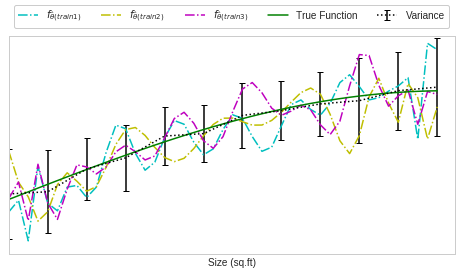

In [127]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(8, 4))
plt.setp(ax, xticks=[], xticklabels=[], yticks=[], yticklabels=[], xlim=(0,1.6), ylim=(0,2))

modles=np.array(modles)

# ax[0].plot(x, modles.mean(axis=0), 'r-.', label='Average Fit')
# ax[0].plot(data['x'], y_true,'g-', label='True Function')
# ax[0].set_xlabel('Size (sq.ft)')
# ax[0].set_ylabel('Price (\$)')

# ax[1].errorbar(x[::4], modles.mean(axis=0)[::4], yerr=2*modles.std(axis=0)[::4], fmt=':k', capsize=3, label='Variance')
# ax[1].plot(x, modles[1], 'c-.', label=r'$f_{\hat\theta(train1)}$')
# ax[1].plot(x, modles[2], 'y-.', label=r'$f_{\hat\theta(train2)}$')
# ax[1].plot(x, modles[3], 'm-.', label=r'$f_{\hat\theta(train3)}$')
# ax[1].plot(data['x'], y_true,'g-', label='True Function')
# ax[1].set_xlabel('Size (sq.ft)')

ax.errorbar(x[::4], modles.mean(axis=0)[::4], yerr=2*modles.std(axis=0)[::4], fmt=':k', capsize=3, label='Variance')
ax.plot(x, modles[1], 'c-.', label=r'$f_{\hat\theta(train1)}$')
ax.plot(x, modles[2], 'y-.', label=r'$f_{\hat\theta(train2)}$')
ax.plot(x, modles[3], 'm-.', label=r'$f_{\hat\theta(train3)}$')
ax.plot(data['x'], y_true,'g-', label='True Function')
ax.set_xlabel('Size (sq.ft)')

# plt.plot(x, modles.mean(axis=0), 'k.-', label=r'Average Fit')
# plt.plot(x, modles[2], 'y-.', label=r'$f_{\hat\theta(train3)}$')
# plt.errorbar(x[::4], [(2*y2.mean()+2*y1.mean()-0.2)/4 for _ in x][::4], yerr=dy, fmt='k', capsize=3, label='Variance')
# plt.fill_between(x, [y2.mean() for _ in x], [y2.mean()-0.3 for _ in x], color='green',alpha=0.2, label='Variance')

# handles, labels = [(a + b) for a, b in zip(ax[0].get_legend_handles_labels(), ax[1].get_legend_handles_labels())]
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', frameon=True, fancybox=True, framealpha=1, ncol=5)
plt.subplots_adjust(wspace=0.01, hspace=0)
plt.savefig('images/var4.pdf', transparent=True, bbox_inches='tight')

## Bias-Variance Tradeoff

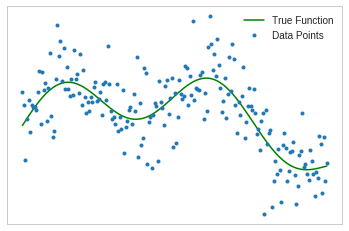

In [101]:
x = x = np.linspace(0, 4*np.pi, 201)
np.random.seed(10)  #Setting seed for reproducability
var = 1
p = np.poly1d([1, 2, 3])
y = np.sin(x) + 0.5*x -  0.05*x**2 + np.random.normal(0,var,len(x))
y_true = np.sin(x) + 0.5*x - 0.05*x**2
max_deg = 20
data_x = [x**(i+1) for i in range(max_deg)] + [y]
data_c = ['x'] + ['x_{}'.format(i+1) for i in range(1,max_deg)] + ['y']
data = pd.DataFrame(np.column_stack(data_x),columns=data_c)

plt.plot(data['x'], y_true, 'g', label='True Function')
# plt.xlabel('Size (sq.ft)')
# plt.ylabel('Price (\$)')
plt.xticks([],[])
plt.yticks([],[])
# plt.ylim(-2,2)
# plt.xlim(0,4*np.pi)
plt.plot(data['x'], data['y'], '.', label='Data Points')
plt.legend()
plt.savefig('images/bv-1.pdf', transparent=True, bbox_inches='tight')

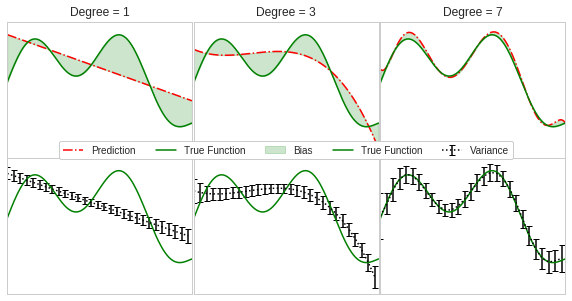

In [100]:
from sklearn.linear_model import LinearRegression

seed=10
fig, ax = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(10, 5))
plt.setp(ax, xticks=[], xticklabels=[], yticks=[], yticklabels=[], xlim=(0,4*np.pi))

degs = [1,3,7]
for i,deg in enumerate(degs):
    predictors = ['x']
    if deg >= 2:
        predictors.extend(['x_%d'%i for i in range(2,deg+1)])  
    
#     print(predictors)
    regressor = LinearRegression(normalize=True)  
    regressor.fit(data[predictors],data['y'])
    y_pred = regressor.predict(data[predictors])

#     ax[0][i].plot(data['x'],data['y'], '.b', label='Actual Prices')
    ax[0][i].plot(data['x'], y_pred,'-.r', label='Prediction')
    ax[0][i].plot(data['x'], y_true,'g', label='True Function')
    ax[0][i].fill_between(x, y_true, y_pred, color='green',alpha=0.2, label='Bias')
    ax[0][i].set_title(f"Degree = {deg}")

for i,deg in enumerate(degs):    
    predictors = ['x']
    models=[]
    
    if deg >= 2:
        predictors.extend(['x_%d'%i for i in range(2,deg+1)])  

    for t,seed in enumerate(range(1,50)):
        np.random.seed(seed)
        y_random = np.sin(x) + 0.5*x - 0.05*x**2 + np.random.normal(0,var,len(x))
        data_x_s = [x**(i+1) for i in range(max_deg)] + [y_random]
        data_c_s = ['x'] + ['x_{}'.format(i+1) for i in range(1,max_deg)] + ['y']
        data_s = pd.DataFrame(np.column_stack(data_x_s),columns=data_c_s)

        predictors = ['x']
        if deg >= 2:
            predictors.extend(['x_%d'%i for i in range(2,deg+1)])  

        regressor = LinearRegression(normalize=True)  
        regressor.fit(data_s[predictors],data_s['y'])
        y_pred = regressor.predict(data_s[predictors])

        models.append(y_pred)
    
    models=np.array(models)
    ax[1][i].errorbar(x[::7], models.mean(axis=0)[::7], yerr=2*models.std(axis=0)[::7], fmt=':k', capsize=3, label='Variance')
    ax[1][i].plot(data['x'], y_true,'g-', label='True Function')

handles, labels = [(a + b) for a, b in zip(ax[0][0].get_legend_handles_labels(), ax[1][0].get_legend_handles_labels())]
fig.legend(handles, labels, loc='center', frameon=True, fancybox=True, framealpha=1, ncol=5)
plt.subplots_adjust(wspace=0.01, hspace=0)
plt.savefig('images/bv-2.pdf', transparent=True, bbox_inches='tight')